In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the csv
main_data = pd.read_csv("../output_data/clean_data_for_analysis.csv")
main_data

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [3]:
# Convert "Release" column to datetime format
main_data["Release"] = pd.to_datetime(main_data["Release"])

In [4]:
# Create separate dataframes for each category
boxoffice_precovid = main_data[(main_data["Release"].dt.year >= 2018) & (main_data["Release"].dt.year <= 2019) & (main_data["Gross"].notnull())]
boxoffice_postcovid = main_data[(main_data["Release"].dt.year >= 2020) & (main_data["Gross"].notnull())]
netflix_precovid = main_data[(main_data["Release"].dt.year >= 2018) & (main_data["Release"].dt.year <= 2019) & (main_data["Platform"].str.contains("netflix", case=False, na=False))]
netflix_postcovid = main_data[(main_data["Platform"].str.contains("netflix", case=False, na=False)) & (main_data["Release"].dt.year >= 2020)]

In [5]:
# Replace NaN values with 0 in the "Gross" column
main_data.loc[(main_data["Release"].dt.year >= 2018) & (main_data["Release"].dt.year <= 2019) & (main_data["Gross"].isnull()), "Gross"] = 0
main_data.loc[(main_data["Release"].dt.year >= 2020) & (main_data["Gross"].isnull()), "Gross"] = 0

In [6]:
# Replace NaN values with 0 in the "Gross" column
main_data.loc[(main_data["Release"].dt.year >= 2018) & (main_data["Release"].dt.year <= 2019) & (main_data["Gross"].isnull()), "Gross"] = 0
main_data.loc[(main_data["Release"].dt.year >= 2020) & (main_data["Gross"].isnull()), "Gross"] = 0

In [7]:
pre_covid_movies = main_data[(main_data["Release"] >= "2018-01-01") & (main_data["Release"] <= "2019-12-31")]
pre_covid_budgets = pre_covid_movies["Budget"].dropna()
pre_covid_total_budget = pre_covid_budgets.sum()
print("Pre-Covid Total Budget: ", pre_covid_total_budget)


Pre-Covid Total Budget:  12850375039.0


In [8]:
post_covid_movies = main_data[(main_data["Release"] >= "2020-01-01") & (main_data["Release"] <= "2022-12-31")]
post_covid_budgets = post_covid_movies["Budget"].dropna()
post_covid_total_budget = post_covid_budgets.sum()
print("Post-Covid Total Budget: ", post_covid_total_budget)


Post-Covid Total Budget:  15992117189.0


In [9]:
# Compute the average budget per genre for each category
boxoffice_precovid_avg = boxoffice_precovid.groupby("Genre")["Budget"].mean().fillna(0)
boxoffice_precovid_avg = boxoffice_precovid_avg/boxoffice_precovid_avg.sum()
boxoffice_precovid_avg = boxoffice_precovid_avg.sort_values(ascending=False)

boxoffice_postcovid_avg = boxoffice_postcovid.groupby("Genre")["Budget"].mean().fillna(0)
boxoffice_postcovid_avg = boxoffice_postcovid_avg/boxoffice_postcovid_avg.sum()
boxoffice_postcovid_avg = boxoffice_postcovid_avg.sort_values(ascending=False)

netflix_precovid_avg = netflix_precovid.groupby("Genre")["Budget"].mean().fillna(0)
netflix_precovid_avg = netflix_precovid_avg/netflix_precovid_avg.sum()
netflix_precovid_avg = netflix_precovid_avg.sort_values(ascending=False)

netflix_postcovid_avg = netflix_postcovid.groupby("Genre")["Budget"].mean().fillna(0)
netflix_postcovid_avg = netflix_postcovid_avg/netflix_postcovid_avg.sum()
netflix_postcovid_avg = netflix_postcovid_avg.sort_values(ascending=False)

In [10]:
# Get the top 5 genres and group the remaining genres as "Other"
top_genres = 5

boxoffice_precovid_avg = boxoffice_precovid_avg[:top_genres]
boxoffice_precovid_avg["Other"] = (1-boxoffice_precovid_avg[:top_genres].sum())

boxoffice_postcovid_avg = boxoffice_postcovid_avg[:top_genres]
boxoffice_postcovid_avg["Other"] = (1-boxoffice_postcovid_avg[:top_genres].sum())

netflix_precovid_avg = netflix_precovid_avg[:top_genres]
netflix_precovid_avg["Other"] = (1-netflix_precovid_avg[:top_genres].sum())

netflix_postcovid_avg = netflix_postcovid_avg[:top_genres]
netflix_postcovid_avg["Other"] = (1-netflix_postcovid_avg[:top_genres].sum())


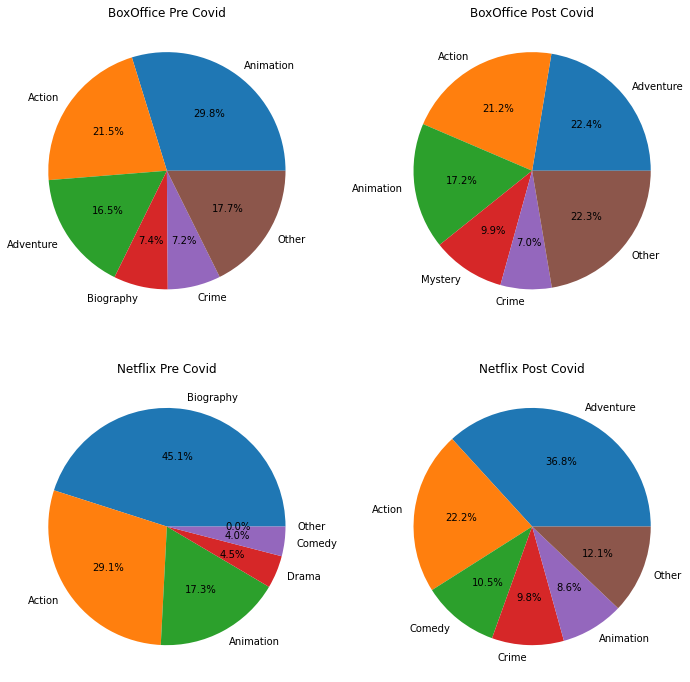

In [11]:
# Plot the pie charts
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].pie(boxoffice_precovid_avg, labels=boxoffice_precovid_avg.index, autopct="%1.1f%%")
axs[0, 0].set_title("BoxOffice Pre Covid")

axs[0, 1].pie(boxoffice_postcovid_avg, labels=boxoffice_postcovid_avg.index, autopct="%1.1f%%")
axs[0, 1].set_title("BoxOffice Post Covid")

axs[1, 0].pie(netflix_precovid_avg, labels=netflix_precovid_avg.index, autopct="%1.1f%%")
axs[1, 0].set_title("Netflix Pre Covid")

axs[1, 1].pie(netflix_postcovid_avg, labels=netflix_postcovid_avg.index, autopct="%1.1f%%")
axs[1, 1].set_title("Netflix Post Covid")

plt.show()